<small><i>This notebook was put together by [Steve Tang](https://stevetang92.wordpress.com/) A helpful data can be found at [GitHub](https://github.com/jakevdp/sklearn_pycon2014/).</i></small>

## Simple Changes
Below is an example of a the iris dataset being trained by a K nearist neighbefor classifer. The code below it is only slightly modified, the modifications allow it to train a support vector classifer. Scikit-Learn allows us to just change a couple lines of code to train our data.

In [1]:
from sklearn import neighbors, datasets
unknown_iris = [[3, 5, 4, 2]]
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
print (iris.target_names[clf.predict([[3, 5, 4, 2]])])

['virginica']


In [2]:
from sklearn.svm import SVC
unknown_iris = [[3, 5, 4, 2]]
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = SVC()
clf.fit(X, y) 
clf.predict(unknown_iris)
print(iris.target_names[clf.predict(unknown_iris)])

['virginica']


## Digits Dataset
Scikit_Learn has a digit dataset that is simular to Mnist data set.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
# Loads the data for digits
digits = load_digits()
# Gives us information on the dataset
digits.keys()

# Gives us the dimensions of the input data
X = digits.data
# Gives us the dimensions of the output data
y = digits.target
print(X.shape)
print(y.shape)





(1797, 64)
(1797,)


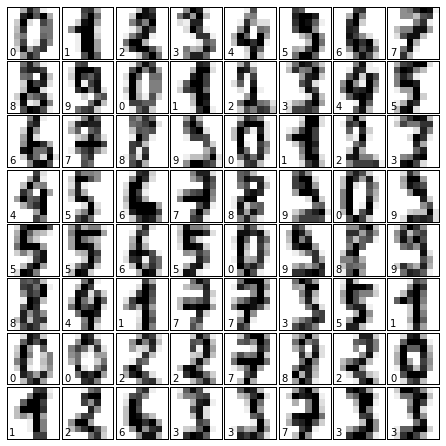

In [4]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


## Results of Difference Trials with SVMs and Random Forest 



SVC: kernel = linear
Accuracy = 0.971111111111
SVC: kernel = rbf
Accuracy = 0.486666666667
RF: max_depth = 4
Accuracy = 0.846666666667
RF: max_depth = 8
Accuracy = 0.928888888889
RF: max_depth = 12
Accuracy = 0.942222222222


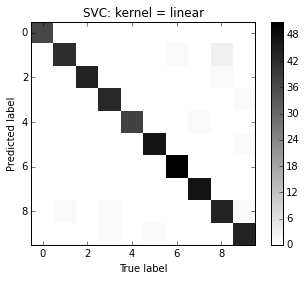

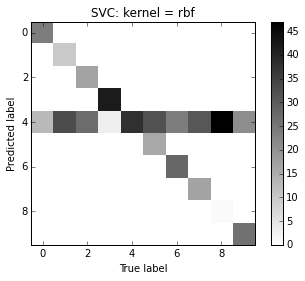

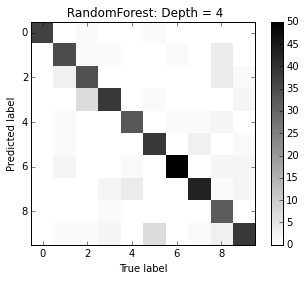

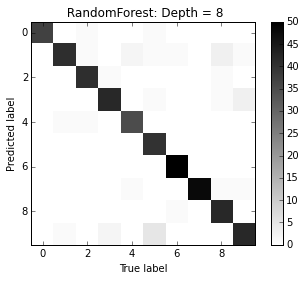

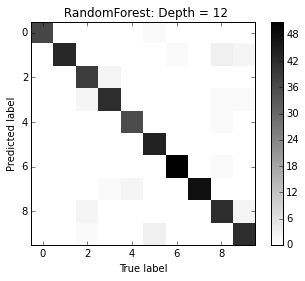

In [8]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier



#Divide data into test and traing datasets 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

#Running SVM with Linear and radial basis function
for kernel in ['linear', 'rbf']:
    #Traing the model with Xtrain and ytrain
    clf = SVC(kernel=kernel).fit(Xtrain, ytrain)
    # Use trained Classifer to predict the test set
    ypred = clf.predict(Xtest)
    print("SVC: kernel = {0}".format(kernel))
    print("Accuracy =", metrics.accuracy_score(ytest, ypred))
    plt.figure()
    #Returns a graph of the confusion matrix to help us visualize errros if any. 
    plt.imshow(metrics.confusion_matrix(ypred, ytest),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title("SVC: kernel = {0}".format(kernel))
    
#Running RandomForestClassifier
for max_depth in [4, 8, 12]:
    #Traing the model with Xtrain and ytrain
    clf = RandomForestClassifier(max_depth=max_depth).fit(Xtrain, ytrain)
    # Use trained Classifer to predict the test set
    ypred = clf.predict(Xtest)
    print("RF: max_depth = {0}".format(max_depth))
    print("Accuracy =", metrics.accuracy_score(ytest, ypred))
    plt.figure()
    #Returns a graph of the confusion matrix to help us visualize errros if any. 
    plt.imshow(metrics.confusion_matrix(ypred, ytest),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title(" RandomForest: Depth = {0}".format(max_depth))